In [1]:
import pandas as pd
import numpy as np
import pickle
import datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from statsmodels.tsa.seasonal import seasonal_decompose


path_excel = 'C:\\Users\\SIMGEK\\Desktop\\BOUN\\ETM58D - Business Analytics\\Project'
save_output = 'Feature_Distributions'


In [2]:
# Load data the last data stored
with open('data_all.pickle', 'rb') as handle:
    data = pickle.load(handle)

data.head()

,price,event_date,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits
791,-1.00,2020-03-21,3904356,0,2,0,0,942,148,953347,61228451
784,64.94,2020-03-21,4066298,197,2152,70,509,203,48,39446,61228451
785,101.72,2020-03-21,32939029,119,5012,325,607,182,78,56314,61228451
786,39.99,2020-03-21,31515569,494,23025,937,4978,1298,67,522917,61228451
790,222.84,2020-03-21,7061886,22,1821,68,101,113,8,124712,61228451


## Explanatory Data Analysis

In [700]:
data.dtypes

price                         float64
event_date             datetime64[ns]
product_content_id             object
sold_count                      int64
visit_count                     int64
favored_count                   int64
basket_count                    int64
category_sold                   int64
category_brand_sold             int64
category_visits                 int64
ty_visits                       int64
dtype: object

In [701]:
print('Minimum Date : ' + str(data.event_date.min()))
print('Maximum Date : ' + str(data.event_date.max()))

Minimum Date : 2020-03-21 00:00:00
Maximum Date : 2020-06-27 00:00:00


In [702]:
## Feature Distributions

# for i in data.loc[:, (data.columns != 'product_content_id') & (data.columns != 'event_date')].columns:
#     sheet_name = str(i)
#     writer = pd.ExcelWriter(save_output +'_' +str(i) +'.xlsx')
    
#     dist = data[['product_content_id',i]].groupby('product_content_id').describe(percentiles = [i/100 for i in range(0,100,5)]).transpose()
    
#     dist.to_excel(writer, sheet_name, startcol = 0, startrow = 0)
#     writer.save()

In [3]:
data['month'] = data['event_date'].dt.month
data['year'] = data['event_date'].dt.year
data['yearmonth'] = data['year'] *100 + data['month']
data['weekofyear'] = data['event_date'].dt.weekofyear
data['weekday'] = data['event_date'].dt.weekday
data['weekday'] = data['weekday'].astype('str')
data.head()

,price,event_date,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,month,year,yearmonth,weekofyear,weekday
791,-1.00,2020-03-21,3904356,0,2,0,0,942,148,953347,61228451,3,2020,202003,12,5
784,64.94,2020-03-21,4066298,197,2152,70,509,203,48,39446,61228451,3,2020,202003,12,5
785,101.72,2020-03-21,32939029,119,5012,325,607,182,78,56314,61228451,3,2020,202003,12,5
786,39.99,2020-03-21,31515569,494,23025,937,4978,1298,67,522917,61228451,3,2020,202003,12,5
790,222.84,2020-03-21,7061886,22,1821,68,101,113,8,124712,61228451,3,2020,202003,12,5


In [4]:
## From distributions, we saw there are  -1 values which are NaN values. We turn them into NaN to impute later.
data.replace(-1, np.nan, inplace = True)

### Correlation Analysis

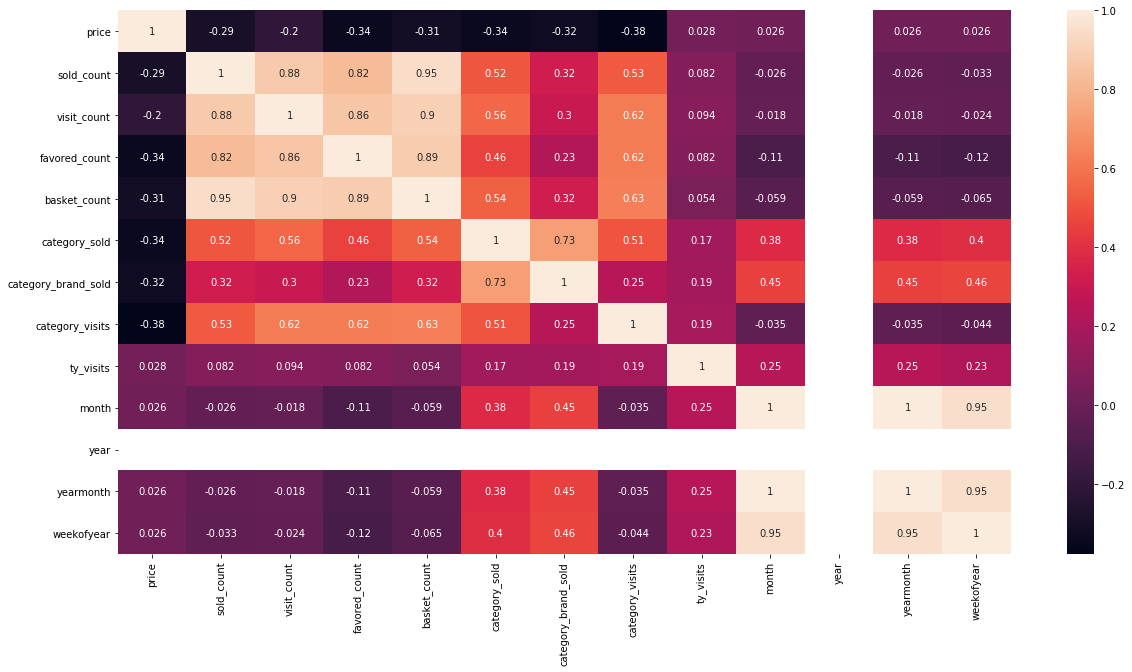

In [705]:
# Correlation
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True);

We can see a strong positive correlation between the sold_count and visit_count, favored_count and basket_count. Category_sold and category_visits can also have influence on sold_count. 

From correlation graph, we can select the features to be include in the modeling dataset.

### Trends over periods

C:\Users\SIMGEK\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SIMGEK\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SIMGEK\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings

<Figure size 1440x1440 with 0 Axes>

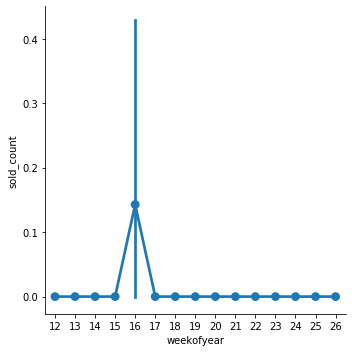

<Figure size 1440x1440 with 0 Axes>

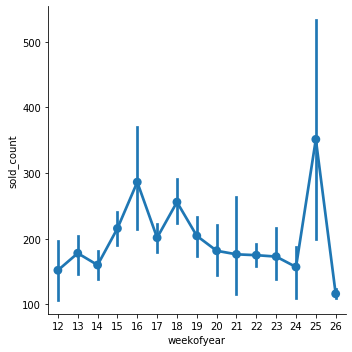

<Figure size 1440x1440 with 0 Axes>

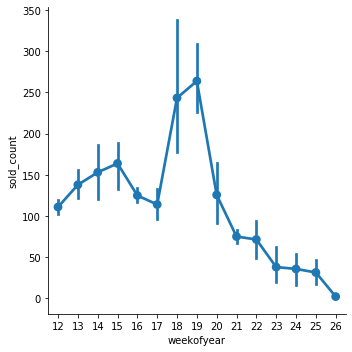

<Figure size 1440x1440 with 0 Axes>

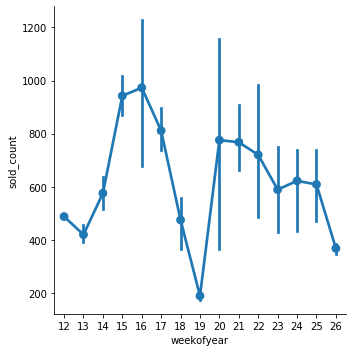

<Figure size 1440x1440 with 0 Axes>

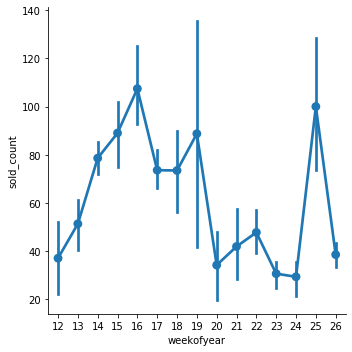

<Figure size 1440x1440 with 0 Axes>

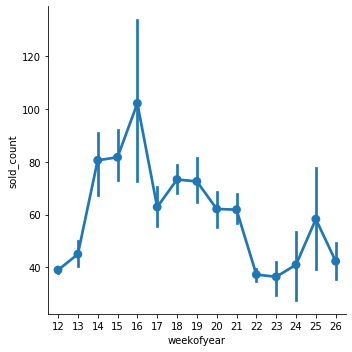

<Figure size 1440x1440 with 0 Axes>

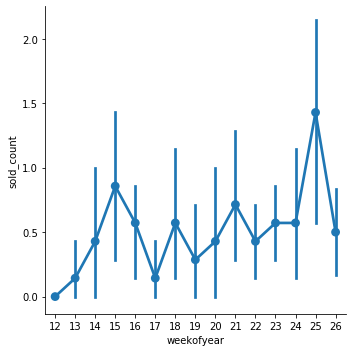

<Figure size 1440x1440 with 0 Axes>

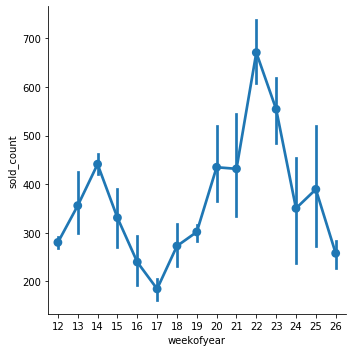

In [706]:
products = pd.unique(data["product_content_id"])

for i in products:
    plot_data = data[data['product_content_id'] == str(i)]

    # Sales trend over the weeks
    plt.figure(figsize = (20, 20))
    sns_plot = sns.factorplot(data = plot_data, x ="weekofyear", y = "sold_count")
    sns_plot.savefig("Weekly_Trends_"+str(i)+"_.png")

    

In [707]:
##### Product_Id  Top Hier.       Bottom Hier.                    Brand
##### 85004       Kozmetik        Yuz Temizleyici                 La Roche Posay
##### 4066298     Supermarket     Islak Mendil & Havlu            Sleepy
##### 6676673     Elektronik      Telefon Bluetooth Kulaklik      Xiaomi
##### 7061886     Elektronik      Supurge                         Fakir
##### 31515569    Giyim           Tayt                            TRENDYOLMILLA
##### 32939029    Supermarket     Sarj Edilebilir Dis Fircasi     Oral-B
##### 5926527     Giyim           Bikini Ustu                     TRENDYOLMILLA
##### 3904356     Giyim           Mont                            Koton

In [708]:
for i in products:
    analysis_df = data[data['product_content_id'] == str(i)]
    print('Analysis for product '+str(i))
    print(analysis_df[['sold_count','weekofyear']].groupby('weekofyear').describe())

Analysis for product 3904356
           sold_count                                             
                count      mean       std  min  25%  50%  75%  max
weekofyear                                                        
12                2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
13                7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
14                7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
15                7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
16                7.0  0.142857  0.377964  0.0  0.0  0.0  0.0  1.0
17                7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
18                7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
19                7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
20                7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
21                7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
22                7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
23                7.0  0.000000  

           sold_count                                                        
                count        mean        std   min   25%    50%    75%    max
weekofyear                                                                   
12                2.0   39.000000   1.414214  38.0  38.5   39.0   39.5   40.0
13                7.0   45.000000   6.806859  38.0  40.0   42.0   50.0   55.0
14                7.0   80.571429  18.374413  43.0  78.0   85.0   90.5   99.0
15                7.0   81.714286  14.568394  66.0  72.0   79.0   89.5  104.0
16                7.0  102.142857  44.611017  53.0  64.0  108.0  130.5  165.0
17                7.0   62.857143  10.854010  47.0  57.0   63.0   68.0   80.0
18                7.0   73.285714   7.931252  65.0  67.5   69.0   80.0   84.0
19                7.0   72.571429  12.972498  57.0  64.5   71.0   77.5   96.0
20                7.0   62.142857   9.771192  50.0  53.0   66.0   70.0   73.0
21                7.0   61.857143   8.214389  50.0  58.5   60.0 

There was only demand for Mont (3904356) in the 16th week in April. We can predict that there was not any demand for it during summer.

Demand for Islak Mendil reaches its peak during 25th week. Demand is variying during 25th week, while one day it has min of 278 purchase, the other day it can sell more than 800.

Demand for Şarj Edilebilir Diş Fırçası increased in 18-19 th weeks then it drops. There may be a campaign effect in that weeks.

Demand for Tayt is fluactuating. It lowers in the 19th week but generally it follows an high sales variance.

Yüz temizleyici and bluetooth kulaklık have also fluctuating demand

There was not demand for bikini üstü during spring. It gets higher in the 25th week and can be expected to get higher

In the first weeks of Covid karantina, demand for süpürge increased and then decreased. In the 25th week there is a peak demand which may be due to campaign (There are many supurge campaigns in my account in these days)

There were Ramazan Bayramı in the 22th week but we did not observe any fluctuation except Telefon Bluetooth Kulaklik. Since there were not any holiday and it was carantina during Bayram, it may not effect the sales. Theregore,
we did not exclude 22th week from our dataset.

In [709]:
data.head()

,price,event_date,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,month,year,yearmonth,weekofyear,weekday
791,NaN,2020-03-21,3904356,0,2,0,0,942.0,148.0,953347.0,61228451,3,2020,202003,12,5
784,64.94,2020-03-21,4066298,197,2152,70,509,203.0,48.0,39446.0,61228451,3,2020,202003,12,5
785,101.72,2020-03-21,32939029,119,5012,325,607,182.0,78.0,56314.0,61228451,3,2020,202003,12,5
786,39.99,2020-03-21,31515569,494,23025,937,4978,1298.0,67.0,522917.0,61228451,3,2020,202003,12,5
790,222.84,2020-03-21,7061886,22,1821,68,101,113.0,8.0,124712.0,61228451,3,2020,202003,12,5


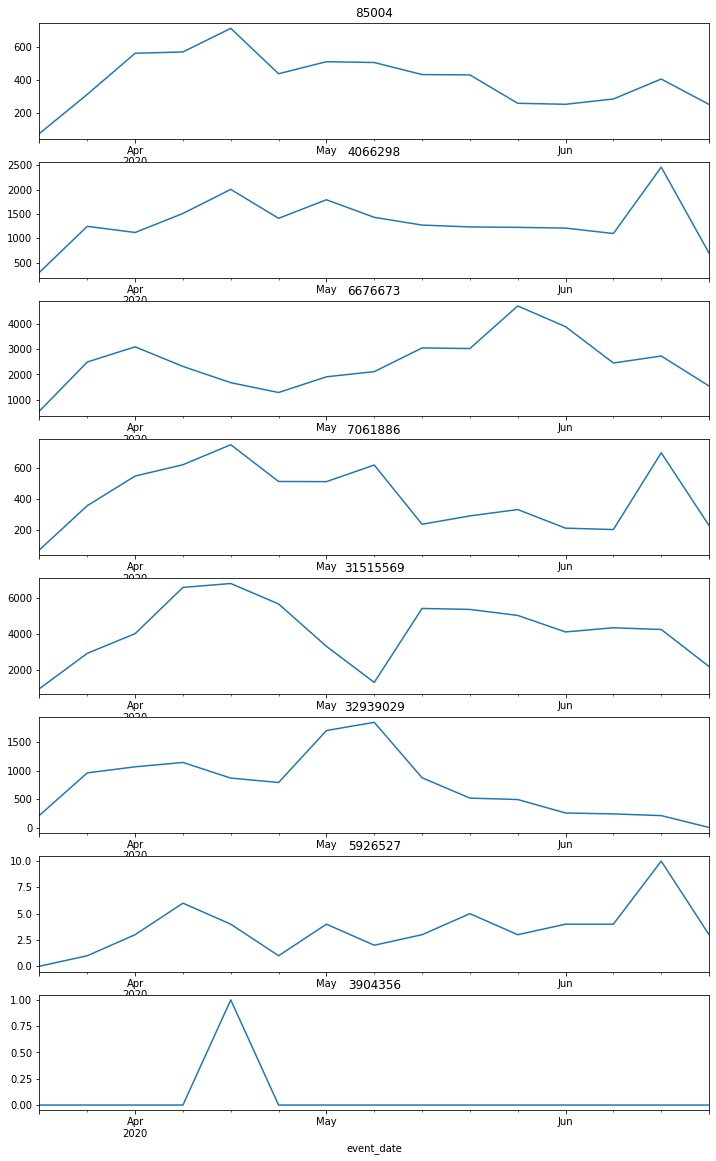

In [710]:
# Assigning one store from each category
data.set_index('event_date', inplace = True)
sales_a = data[data.product_content_id == '85004']['sold_count']
sales_b = data[data.product_content_id == '4066298']['sold_count']
sales_c = data[data.product_content_id == '6676673']['sold_count']
sales_d = data[data.product_content_id == '7061886']['sold_count']
sales_e = data[data.product_content_id == '31515569']['sold_count']
sales_f = data[data.product_content_id == '32939029']['sold_count']
sales_g = data[data.product_content_id == '5926527']['sold_count']
sales_h = data[data.product_content_id == '3904356']['sold_count']


f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, figsize = (12, 20))

# Trend
sales_a.resample('W').sum().plot(ax = ax1, title = '85004'   )
sales_b.resample('W').sum().plot(ax = ax2, title = '4066298' )
sales_c.resample('W').sum().plot(ax = ax3, title = '6676673' )
sales_d.resample('W').sum().plot(ax = ax4, title = '7061886' )
sales_e.resample('W').sum().plot(ax = ax5, title = '31515569')
sales_f.resample('W').sum().plot(ax = ax6, title = '32939029')
sales_g.resample('W').sum().plot(ax = ax7, title = '5926527' )
sales_h.resample('W').sum().plot(ax = ax8, title = '3904356' )
f.savefig("Trends.png")

data.reset_index(inplace = True)

In [711]:
data.head()

,event_date,price,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,month,year,yearmonth,weekofyear,weekday
0,2020-03-21,NaN,3904356,0,2,0,0,942.0,148.0,953347.0,61228451,3,2020,202003,12,5
1,2020-03-21,64.94,4066298,197,2152,70,509,203.0,48.0,39446.0,61228451,3,2020,202003,12,5
2,2020-03-21,101.72,32939029,119,5012,325,607,182.0,78.0,56314.0,61228451,3,2020,202003,12,5
3,2020-03-21,39.99,31515569,494,23025,937,4978,1298.0,67.0,522917.0,61228451,3,2020,202003,12,5
4,2020-03-21,222.84,7061886,22,1821,68,101,113.0,8.0,124712.0,61228451,3,2020,202003,12,5


### Outlier Analysis

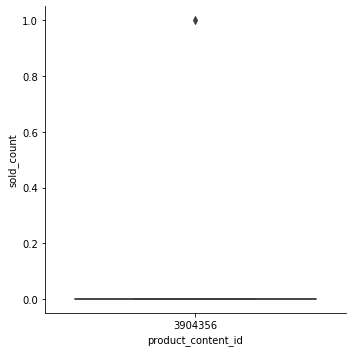

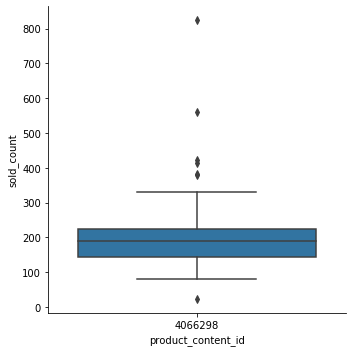

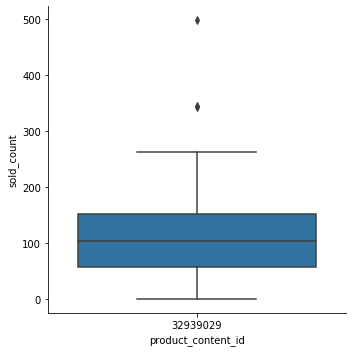

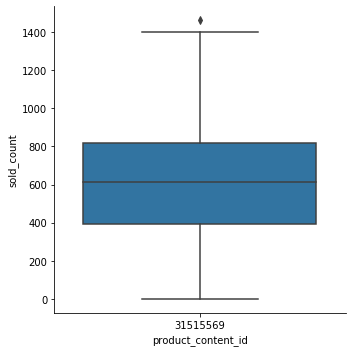

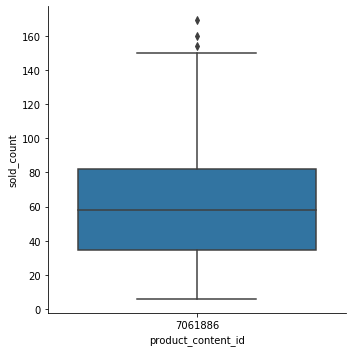

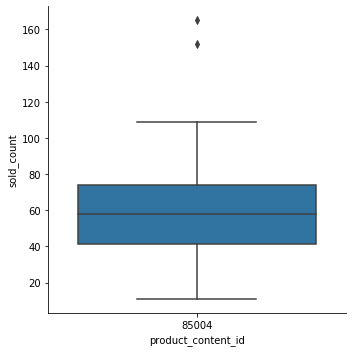

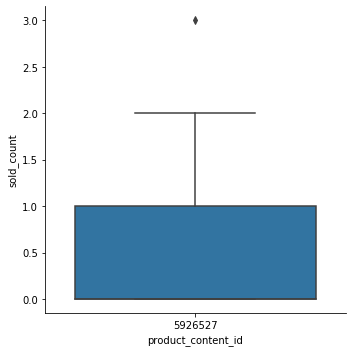

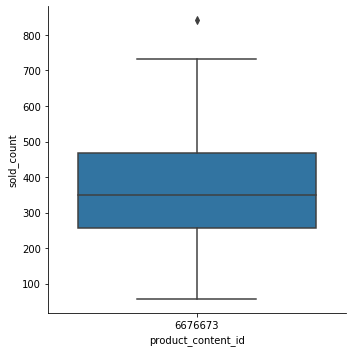

In [712]:
for i in products:
    plot_df = data[data['product_content_id'] == i]
    box_plt = sns.catplot(x="product_content_id", y="sold_count",kind="box", data=plot_df)
    box_plt.savefig("Box_Plot"+str(i)+"_.png")

Both feature distributions and box plots above, we can check outlier values. While creating lag features, we need to be careful with the outlier values since these values highly effects the mean values.

We can apply IQR Method to eliminate outliers group by product_id.

3904356 and 5926527 will not be predicte by a model, Moving average (3) will be applied.

For the remaining products, we will create yesterday, 3 days average, 7 days average and 14 days average values for each feature.

## Feature Engineering

In [5]:
model_data = pd.DataFrame()
model_data = data[['event_date','month', 'year', 'yearmonth', 'weekofyear', 'weekday', 'product_content_id', 'sold_count']]
model_data.head()

,event_date,month,year,yearmonth,weekofyear,weekday,product_content_id,sold_count
791,2020-03-21,3,2020,202003,12,5,3904356,0
784,2020-03-21,3,2020,202003,12,5,4066298,197
785,2020-03-21,3,2020,202003,12,5,32939029,119
786,2020-03-21,3,2020,202003,12,5,31515569,494
790,2020-03-21,3,2020,202003,12,5,7061886,22


In [6]:
features = ['sold_count', 'visit_count', 'favored_count', 'basket_count', 'category_sold', 'category_visits']

products = pd.unique(data["product_content_id"])

# Dünün değerleri
for i in features:
    model_data[str(i)+'_1d'] = data.groupby("product_content_id")[i].shift(1)

## Son 3 Gün, 7 Gün ve 14 Gün ortalama değerleri (Ortalama değerler için outlierlar elenir)
for col in features:
    urun_merge = pd.DataFrame()
    for i in products:
        df = data[data['product_content_id'] == i]
        
        # 1st quartile (25%)
        Q1 = np.nanpercentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.nanpercentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        
        df_upd = df[(df[col] >= Q1 - outlier_step) & (df[col] <= Q3 + outlier_step)]
        df_upd[str(col)+'_AVG_2D'] = df_upd[col].rolling(window=2).mean()
        df_upd[str(col)+'_AVG_3D'] = df_upd[col].rolling(window=3).mean()
        df_upd[str(col)+'_AVG_7D'] = df_upd[col].rolling(window=7).mean()
        df_upd[str(col)+'_AVG_14D'] = df_upd[col].rolling(window=14).mean()
        
        a = pd.merge(df, 
             df_upd[['event_date', 'product_content_id', str(col)+'_AVG_2D', str(col)+'_AVG_3D',str(col)+'_AVG_7D',str(col)+'_AVG_14D']],
             how='left',
             left_on=['product_content_id', 'event_date'],
             right_on=['product_content_id', 'event_date'])
        
        urun_merge = urun_merge.append(a)
    
    model_data = pd.merge(model_data, 
         urun_merge[['event_date', 'product_content_id', str(col)+'_AVG_2D', str(col)+'_AVG_3D',str(col)+'_AVG_7D',str(col)+'_AVG_14D']],
         how='left',
         left_on=['product_content_id', 'event_date'],
         right_on=['product_content_id', 'event_date'])



C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [7]:
## Sold_count / Visit_Count Ratio

model_data['sold_visit_ratio_1d'] = model_data['sold_count_1d'] / model_data['visit_count_1d']*100
model_data['sold_visit_ratio_3d'] = model_data['sold_count_AVG_3D'] / model_data['visit_count_AVG_3D']*100
model_data['sold_visit_ratio_7d'] = model_data['sold_count_AVG_7D'] / model_data['visit_count_AVG_7D']*100
model_data['sold_visit_ratio_14d'] = model_data['sold_count_AVG_14D'] / model_data['visit_count_AVG_14D']*100


In [8]:
model_data.columns.to_list()

['event_date',
 'month',
 'year',
 'yearmonth',
 'weekofyear',
 'weekday',
 'product_content_id',
 'sold_count',
 'sold_count_1d',
 'visit_count_1d',
 'favored_count_1d',
 'basket_count_1d',
 'category_sold_1d',
 'category_visits_1d',
 'sold_count_AVG_2D',
 'sold_count_AVG_3D',
 'sold_count_AVG_7D',
 'sold_count_AVG_14D',
 'visit_count_AVG_2D',
 'visit_count_AVG_3D',
 'visit_count_AVG_7D',
 'visit_count_AVG_14D',
 'favored_count_AVG_2D',
 'favored_count_AVG_3D',
 'favored_count_AVG_7D',
 'favored_count_AVG_14D',
 'basket_count_AVG_2D',
 'basket_count_AVG_3D',
 'basket_count_AVG_7D',
 'basket_count_AVG_14D',
 'category_sold_AVG_2D',
 'category_sold_AVG_3D',
 'category_sold_AVG_7D',
 'category_sold_AVG_14D',
 'category_visits_AVG_2D',
 'category_visits_AVG_3D',
 'category_visits_AVG_7D',
 'category_visits_AVG_14D',
 'sold_visit_ratio_1d',
 'sold_visit_ratio_3d',
 'sold_visit_ratio_7d',
 'sold_visit_ratio_14d']

There can be missing values due to outlier eliminations, due to data coming and lagging variables. We can inpute them with median values of the each product_id and weekday.

In [9]:
model_data.isna().any()

event_date                 False
month                      False
year                       False
yearmonth                  False
weekofyear                 False
weekday                    False
product_content_id         False
sold_count                 False
sold_count_1d               True
visit_count_1d              True
favored_count_1d            True
basket_count_1d             True
category_sold_1d            True
category_visits_1d          True
sold_count_AVG_2D           True
sold_count_AVG_3D           True
sold_count_AVG_7D           True
sold_count_AVG_14D          True
visit_count_AVG_2D          True
visit_count_AVG_3D          True
visit_count_AVG_7D          True
visit_count_AVG_14D         True
favored_count_AVG_2D        True
favored_count_AVG_3D        True
favored_count_AVG_7D        True
favored_count_AVG_14D       True
basket_count_AVG_2D         True
basket_count_AVG_3D         True
basket_count_AVG_7D         True
basket_count_AVG_14D        True
category_s

In [10]:
model_data = model_data.fillna(model_data.groupby(['product_content_id','weekday']).transform('median'))

In [11]:
model_data.isna().any()

event_date                 False
month                      False
year                       False
yearmonth                  False
weekofyear                 False
weekday                    False
product_content_id         False
sold_count                 False
sold_count_1d              False
visit_count_1d             False
favored_count_1d           False
basket_count_1d            False
category_sold_1d           False
category_visits_1d         False
sold_count_AVG_2D          False
sold_count_AVG_3D          False
sold_count_AVG_7D          False
sold_count_AVG_14D         False
visit_count_AVG_2D         False
visit_count_AVG_3D         False
visit_count_AVG_7D         False
visit_count_AVG_14D        False
favored_count_AVG_2D       False
favored_count_AVG_3D       False
favored_count_AVG_7D       False
favored_count_AVG_14D      False
basket_count_AVG_2D        False
basket_count_AVG_3D        False
basket_count_AVG_7D        False
basket_count_AVG_14D       False
category_s

In [92]:
# Store data
with open('model_data_all.pickle', 'wb') as handle:
    pickle.dump(model_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [93]:
model_data.shape

(792, 36)

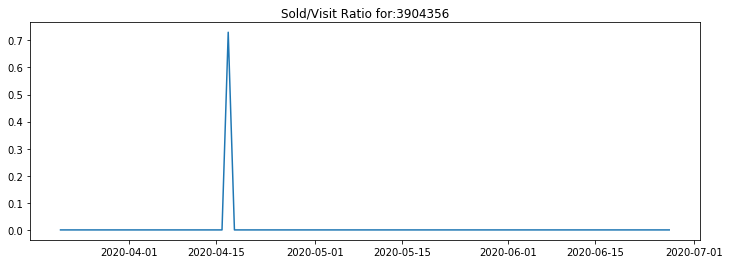

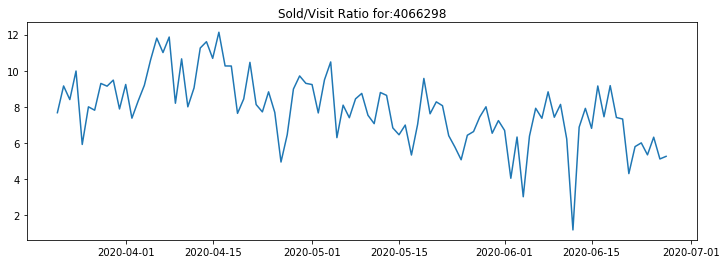

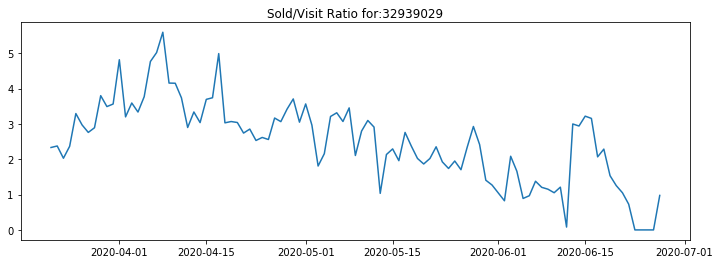

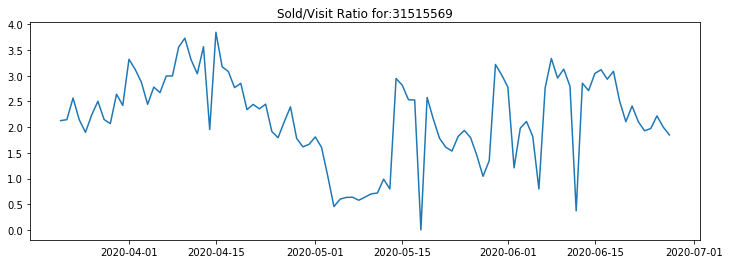

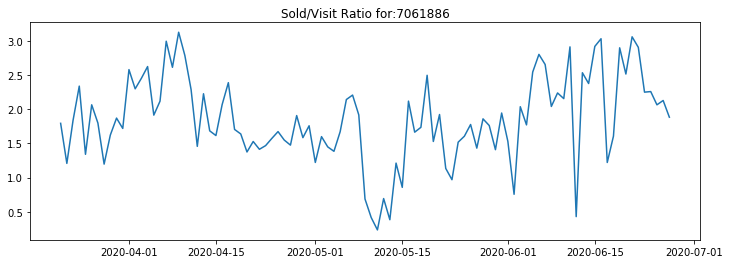

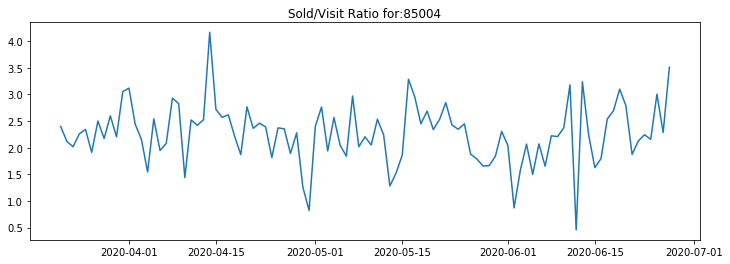

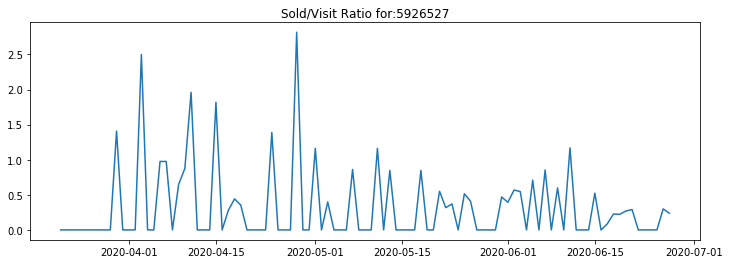

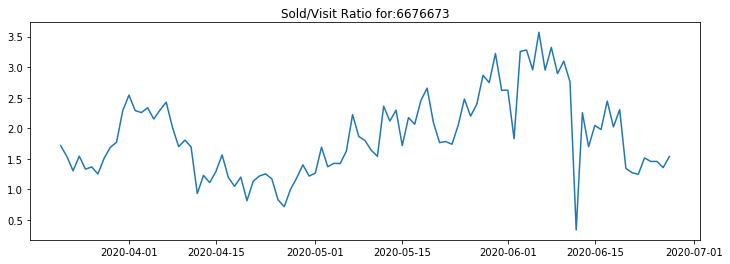

In [722]:
## Check sold to visit ratios
for i in products:
    plot_data = model_data[model_data['product_content_id'] == str(i)]

    # Sales trend over the weeks
    plt.figure(figsize = (12, 4))
    plt.plot("event_date","sold_visit_ratio_1d", data = plot_data)
    plt.title('Sold/Visit Ratio for:' +str(i))
    plt.show()
    

## Modeling

Moving average (3), ..... algorithmns will be used and their results will be compared.

### Moving average (3)

In [723]:
products = pd.unique(data["product_content_id"])

In [724]:
ma_df = model_data[['event_date', 'weekday', 'product_content_id', 'sold_count', 'sold_count_AVG_3D']]
ma_df['Abs_Error'] = round(((ma_df['sold_count'] -  ma_df['sold_count_AVG_3D'])).abs(),2)
ma_df['Abs_Error_Percentage'] = round(((ma_df['sold_count'] -  ma_df['sold_count_AVG_3D'])/ma_df['sold_count'] *100).abs(),2)

for i in products:
    analysis_df = ma_df[ma_df['product_content_id'] == str(i)]
    print('Analysis for product '+str(i))
    dist = (analysis_df[['Abs_Error','Abs_Error_Percentage','weekday']].groupby('weekday').describe().transpose())
    print(dist)
    
#     sheet_name = str(i)
#     writer = pd.ExcelWriter('MA_RESULT' +'_' +str(i) +'.xlsx')
    
#     dist.to_excel(writer, sheet_name, startcol = 0, startrow = 0)
#     writer.save()

C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Analysis for product 3904356
weekday                        0     1     2           3     4     5     6
Abs_Error            count  14.0  14.0  14.0   14.000000  14.0  15.0  14.0
                     mean    0.0   0.0   0.0    0.071429   0.0   0.0   0.0
                     std     0.0   0.0   0.0    0.267261   0.0   0.0   0.0
                     min     0.0   0.0   0.0    0.000000   0.0   0.0   0.0
                     25%     0.0   0.0   0.0    0.000000   0.0   0.0   0.0
                     50%     0.0   0.0   0.0    0.000000   0.0   0.0   0.0
                     75%     0.0   0.0   0.0    0.000000   0.0   0.0   0.0
                     max     0.0   0.0   0.0    1.000000   0.0   0.0   0.0
Abs_Error_Percentage count   0.0   0.0   0.0    1.000000   0.0   0.0   0.0
                     mean    NaN   NaN   NaN  100.000000   NaN   NaN   NaN
                     std     NaN   NaN   NaN         NaN   NaN   NaN   NaN
                     min     NaN   NaN   NaN  100.000000   NaN   NaN   

                     max    67.440000  104.600000  91.300000  
Analysis for product 5926527
weekday                             0          1          2          3  \
Abs_Error            count  14.000000  14.000000  14.000000  14.000000   
                     mean    0.379286   0.428571   0.571429   0.405000   
                     std     0.342378   0.422426   0.733787   0.269123   
                     min     0.000000   0.000000   0.000000   0.000000   
                     25%     0.330000   0.000000   0.000000   0.330000   
                     50%     0.330000   0.330000   0.330000   0.330000   
                     75%     0.330000   0.670000   0.670000   0.670000   
                     max     1.330000   1.330000   2.670000   0.670000   
Abs_Error_Percentage count  12.000000  10.000000  10.000000  12.000000   
                     mean         inf        inf        inf        inf   
                     std          NaN        NaN        NaN        NaN   
                    

C:\Users\SIMGEK\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Results show that, MA can be used for 3904356 and 5926527. 

### Linear Regression

In [725]:
from sklearn.linear_model import LinearRegression

In [726]:
df_train = model_data[model_data['weekofyear'] < 25]
df_test = model_data[model_data['weekofyear'] >= 25]

to_drop = ['event_date', 'month', 'year', 'yearmonth', 'weekofyear']
df_train.drop(to_drop, axis = 1, inplace = True)
df_test.drop(to_drop, axis = 1, inplace = True)

C:\Users\SIMGEK\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [727]:
## Products to be modeled
products = ['4066298', '32939029', '31515569', '7061886', '85004', '6676673']

for i in products:
    print('Modeling for :' +str(i))
    X_train = df_train[df_train['product_content_id'] == str(i)].drop(['sold_count','product_content_id'], axis = 1)
    y_train = df_train[df_train['product_content_id'] == str(i)]['sold_count']
   
    X_test = df_test[df_test['product_content_id'] == str(i)].drop(['sold_count','product_content_id'], axis = 1)
    y_test = df_test[df_test['product_content_id'] == str(i)]['sold_count']
    
    model = LinearRegression().fit(X_train,y_train)
    
    print('R Squared for Train:', model.score(X_train, y_train))
    print('R Squared for Test:', model.score(X_test, y_test))
    print('\n')

Modeling for :4066298
R Squared for Train: 0.7391586943226858
R Squared for Test: -0.10503088418013529


Modeling for :32939029
R Squared for Train: 0.8042908573678818
R Squared for Test: -35.982564994190966


Modeling for :31515569
R Squared for Train: 0.7743762043319384
R Squared for Test: 0.27167894559900874


Modeling for :7061886
R Squared for Train: 0.8986357004342741
R Squared for Test: 0.2785980633881725


Modeling for :85004
R Squared for Train: 0.7326235820014775
R Squared for Test: 0.13170446420793258


Modeling for :6676673
R Squared for Train: 0.8643048844001204
R Squared for Test: 0.717755966165381




Linear regression gave insufficient results in test dataset.

Let's try it with simpler model with less number of features, only sold_count and visit count lagged variables.

In [728]:
## Products to be modeled
products = ['4066298', '32939029', '31515569', '7061886', '85004', '6676673']
to_drop = ['product_content_id', 'sold_count','favored_count_1d', 'basket_count_1d', 'category_sold_1d', 'category_visits_1d',
 'favored_count_AVG_3D',
 'favored_count_AVG_7D',
 'favored_count_AVG_14D',
 'basket_count_AVG_3D',
 'basket_count_AVG_7D',
 'basket_count_AVG_14D',
 'category_sold_AVG_3D',
 'category_sold_AVG_7D',
 'category_sold_AVG_14D',
 'category_visits_AVG_3D',
 'category_visits_AVG_7D',
 'category_visits_AVG_14D',
 'sold_visit_ratio_1d',
 'sold_visit_ratio_3d',
 'sold_visit_ratio_7d',
 'sold_visit_ratio_14d']

for i in products:
    print('Modeling for :' +str(i))
    X_train = df_train[df_train['product_content_id'] == str(i)].drop(to_drop, axis = 1)
    y_train = df_train[df_train['product_content_id'] == str(i)]['sold_count']
   
    X_test = df_test[df_test['product_content_id'] == str(i)].drop(to_drop, axis = 1)
    y_test = df_test[df_test['product_content_id'] == str(i)]['sold_count']
    
    model = LinearRegression().fit(X_train,y_train)
    pred = model.predict(X_test)
    MAPE = ((abs(y_test - pred)/y_test)*100).mean()
    
    print('R Squared for Train:', model.score(X_train, y_train))
    print('R Squared for Test:', model.score(X_test, y_test))
    print('MAPE: ', MAPE)
    print('\n')

Modeling for :4066298
R Squared for Train: 0.44018494347435316
R Squared for Test: -0.0053354054178544885
MAPE:  46.33626390553446


Modeling for :32939029
R Squared for Train: 0.5685879086941203
R Squared for Test: -1.1274705532644487
MAPE:  inf


Modeling for :31515569
R Squared for Train: 0.5770507421483941
R Squared for Test: 0.6854946667367259
MAPE:  19.48613198755655


Modeling for :7061886
R Squared for Train: 0.7229163335679285
R Squared for Test: 0.04694176028599273
MAPE:  28.535815412065134


Modeling for :85004
R Squared for Train: 0.6063163216200371
R Squared for Test: 0.20648293846000354
MAPE:  33.84541911092562


Modeling for :6676673
R Squared for Train: 0.7733702569600958
R Squared for Test: 0.5769944074067259
MAPE:  17.271698682678622




### XGBoost

In [8]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [730]:
## Encode weekday since it is a categorical variable
dummies = pd.get_dummies(model_data['weekday'], prefix='weekday', prefix_sep="_", dummy_na = True)
model_data.drop('weekday', axis = 1, inplace = True)
model_data = pd.concat([model_data, dummies], axis = 1)

In [731]:
df_train = model_data[model_data['weekofyear'] < 25]
df_test = model_data[model_data['weekofyear'] >= 25]

to_drop = ['event_date', 'month', 'year', 'yearmonth', 'weekofyear']
df_train.drop(to_drop, axis = 1, inplace = True)
df_test.drop(to_drop, axis = 1, inplace = True)

C:\Users\SIMGEK\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Modeling for :4066298
[17:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999999113548
R Squared for Test: -0.17388991672494547
MAPE:  97.46309097454304


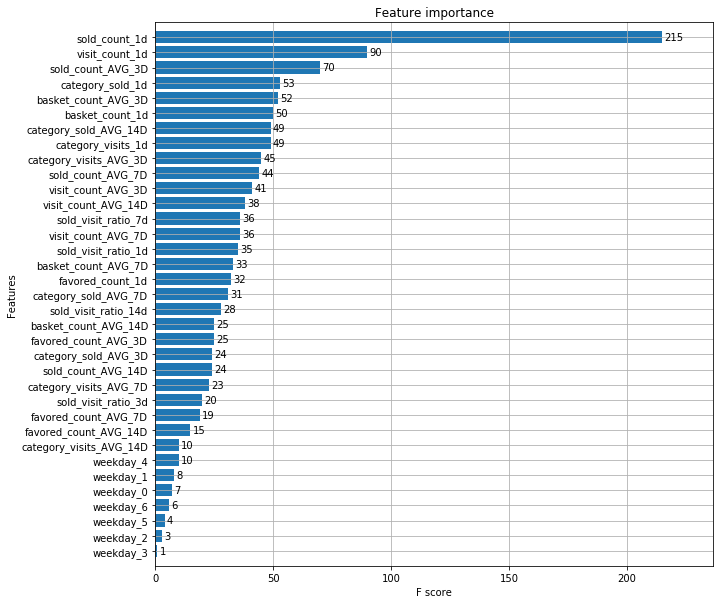

Modeling for :32939029
[17:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999999398865
R Squared for Test: -0.017474106419441915
MAPE:  inf


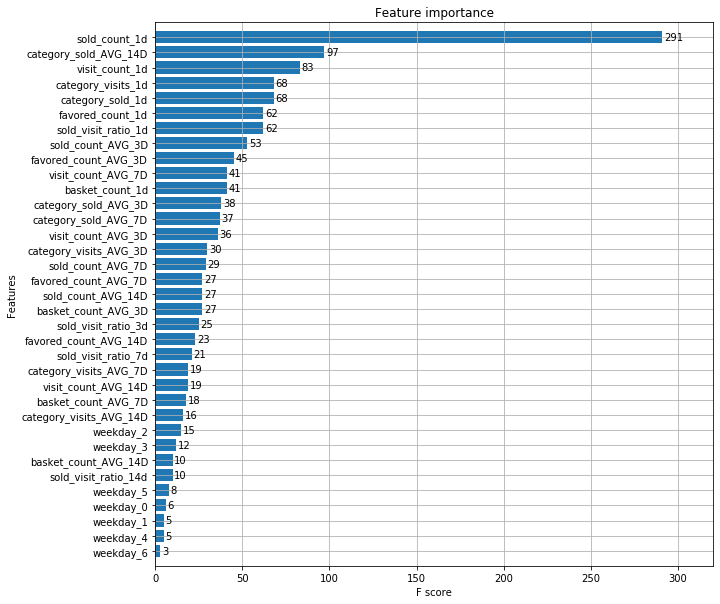

Modeling for :31515569
[17:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999999961868
R Squared for Test: 0.2548814879987652
MAPE:  29.32229792279601


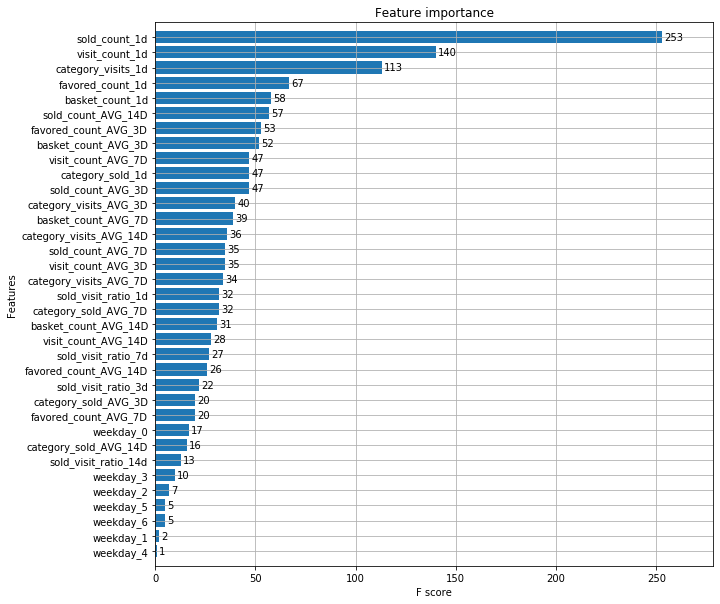

Modeling for :7061886
[17:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999995792013
R Squared for Test: -0.18101580330157407
MAPE:  470.4985044895685


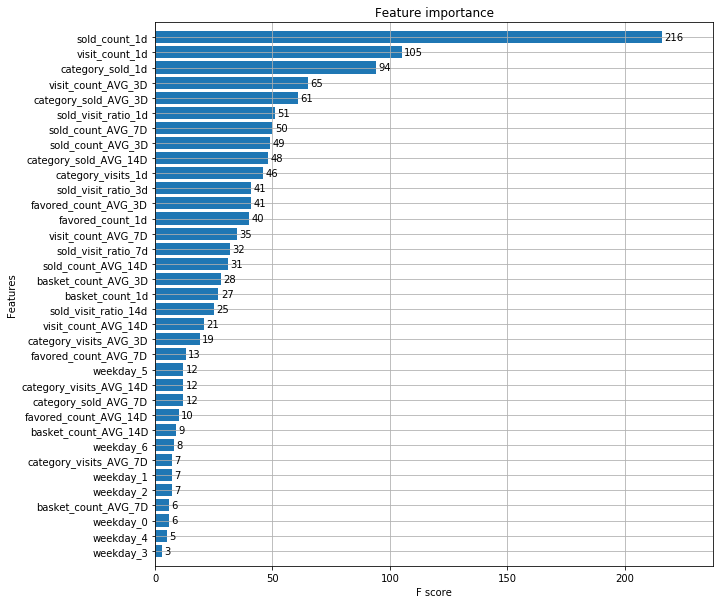

Modeling for :85004
[17:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999992663616
R Squared for Test: 0.07618719498689397
MAPE:  636.8624278612484


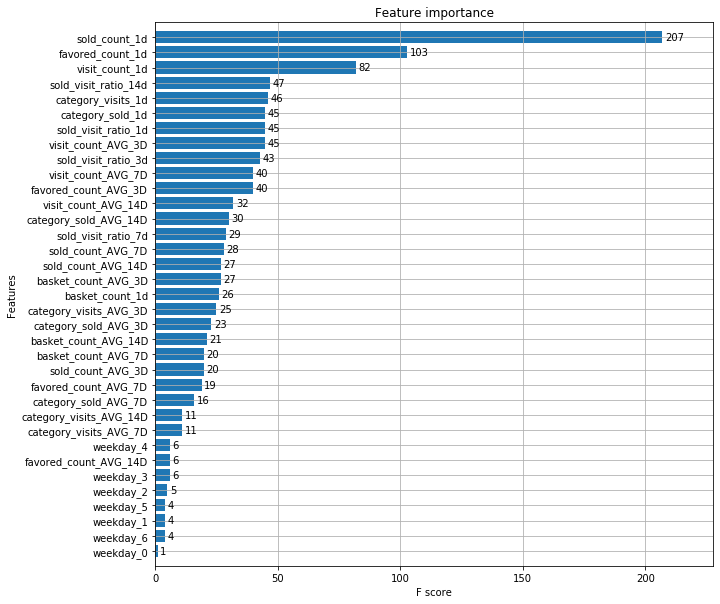

Modeling for :6676673
[17:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999999865368
R Squared for Test: 0.11117408090556613
MAPE:  17.271698682678622


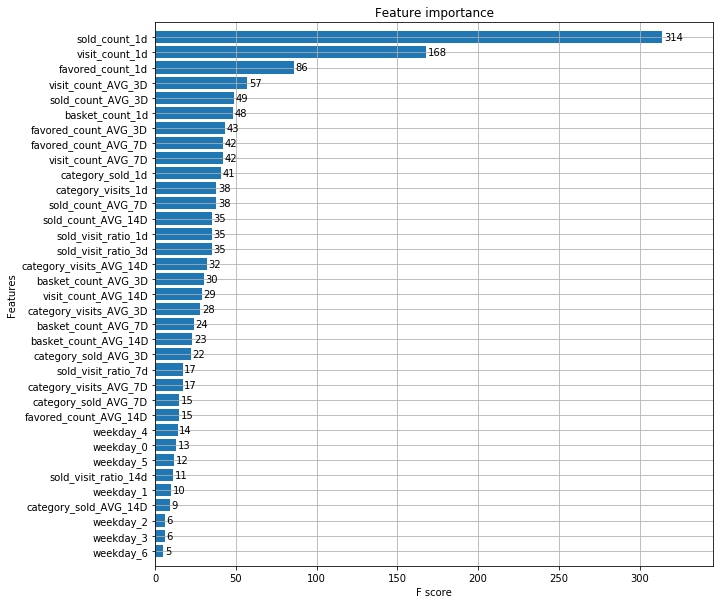

In [733]:
## Products to be modeled
products = ['4066298', '32939029', '31515569', '7061886', '85004', '6676673']

for i in products:
    print('Modeling for :' +str(i))
    X_train = df_train[df_train['product_content_id'] == str(i)].drop(['sold_count','product_content_id'], axis = 1)
    y_train = df_train[df_train['product_content_id'] == str(i)]['sold_count']
   
    X_test = df_test[df_test['product_content_id'] == str(i)].drop(['sold_count','product_content_id'], axis = 1)
    y_test = df_test[df_test['product_content_id'] == str(i)]['sold_count']
    
    params = {'max_depth':6, "booster": "gbtree", 'eta':0.3, 'objective':'reg:linear'} 
   
    dtrain = xgb.DMatrix(X_train, y_train)
    dtest = xgb.DMatrix(X_test, y_test)
    watchlist = [(dtrain, 'train'), (dtest, 'eval')]
    
    # Training the model
    xgboost = xgb.train(params, dtrain, 100, evals=watchlist, early_stopping_rounds= 100, verbose_eval=False)

    # Making predictions
    preds = xgboost.predict(dtest)
    MAPE = ((abs(y_test - pred)/y_test)*100).mean()
    
    print("R Squared for Train:",r2_score(y_train, xgboost.predict(dtrain)))
    print("R Squared for Test:",r2_score(y_test, xgboost.predict(dtest)))
    print('MAPE: ', MAPE)
    # Let's see the feature importance
    fig, ax = plt.subplots(figsize=(10,10))
    xgb.plot_importance(xgboost, max_num_features=50, height=0.8, ax=ax)
    plt.show()

Choose first 5 variables to make simpler model

In [734]:
## Products to be modeled
products = ['4066298', '32939029', '31515569', '7061886', '85004', '6676673']

for i in products:
    print('Modeling for :' +str(i))
    X_train = df_train[df_train['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 'category_sold_1d', 
                                                                  'category_sold_AVG_14D', 'sold_count_AVG_3D', 'basket_count_AVG_3D']]
    y_train = df_train[df_train['product_content_id'] == str(i)]['sold_count']
   
    X_test = df_test[df_test['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 'category_sold_1d', 
                                                                  'category_sold_AVG_14D', 'sold_count_AVG_3D', 'basket_count_AVG_3D']]
    y_test = df_test[df_test['product_content_id'] == str(i)]['sold_count']
    
    params = {'max_depth':6, "booster": "gbtree", 'eta':0.3, 'objective':'reg:linear'} 
   
    dtrain = xgb.DMatrix(X_train, y_train)
    dtest = xgb.DMatrix(X_test, y_test)
    watchlist = [(dtrain, 'train'), (dtest, 'eval')]
    
    # Training the model
    xgboost = xgb.train(params, dtrain, 100, evals=watchlist, early_stopping_rounds= 100, verbose_eval=False)

    # Making predictions
    preds = xgboost.predict(dtest)
    MAPE = ((abs(y_test - preds)/y_test)*100).mean()
    
    print("R Squared for Train:",r2_score(y_train, xgboost.predict(dtrain)))
    print("R Squared for Test:",r2_score(y_test, xgboost.predict(dtest)))
    print('MAPE: ', MAPE)
    print('\n')


Modeling for :4066298
[17:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999997919323
R Squared for Test: -0.03948190230625093
MAPE:  38.10754224087164


Modeling for :32939029
[17:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999998069266
R Squared for Test: 0.08732612721361366
MAPE:  inf


Modeling for :31515569
[17:55:53] WARNING: C:/

Try the models above with gridSearch

In [636]:
## Products to be modeled
products = ['4066298', '32939029', '31515569', '7061886', '85004', '6676673']

for i in products:
    print('Modeling for :' +str(i))
    X_train = df_train[df_train['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 'category_sold_1d', 
                                                                  'category_sold_AVG_14D', 'sold_count_AVG_3D', 'basket_count_AVG_3D']]
    y_train = df_train[df_train['product_content_id'] == str(i)]['sold_count']
   
    X_test = df_test[df_test['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 'category_sold_1d', 
                                                                  'category_sold_AVG_14D', 'sold_count_AVG_3D', 'basket_count_AVG_3D']]
    y_test = df_test[df_test['product_content_id'] == str(i)]['sold_count']
    
    
    # A parameter grid for XGBoost
    params = {
        'min_child_weight': [4, 5],
        'gamma': [i / 10.0 for i in range(3, 6)],
        'subsample': [i / 10.0 for i in range(6, 11)],
        'colsample_bytree': [i / 10.0 for i in range(6, 11)],
        'max_depth': [2, 3, 4]
    }

    # Initialize XGB and GridSearch
    xgb_reg = xgb.XGBRegressor(nthread=-1, objective='reg:squarederror', eval_metric = 'mae')

    grid = GridSearchCV(xgb_reg, params)
    grid.fit(X_train, y_train)

    gridcv_xgb = grid.best_estimator_
    
    print('Best parameters:')
    print(grid.best_params_) 
    print('\n')
    print('Best grid:')
    print(grid.best_estimator_)
      
    # Train the model on training data with best parameters set
    gridcv_xgb.fit(X_train, y_train)
    
    print("R Squared for Train:",r2_score(y_train, gridcv_xgb.predict(X_train)))
    print("R Squared for Test:",r2_score(y_test, gridcv_xgb.predict(X_test)))
    


Modeling for :4066298
Best parameters:
{'colsample_bytree': 1.0, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7}


Best grid:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, eval_metric='mae',
             gamma=0.3, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1, nthread=-1,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
R Squared for Train: 0.9805742230932767
R Squared for Test: -0.252598625362646
Modeling for :32939029
Best parameters:
{'colsample_bytree': 1.0, 'gamma': 0.3, 'max_depth': 4, 'min_child_weight': 5

All the results show that models are learning train data very well but remain insufficient to explain unseen data.

Let's change the train/test dataset settings. Choose 3rd and 6th days of the week as test set and set the remaining to train dataset.

In [16]:
# Load data the last data stored
with open('model_data_all.pickle', 'rb') as handle:
    model_data = pickle.load(handle)

model_data.head()

,event_date,month,year,yearmonth,weekofyear,weekday,product_content_id,sold_count,sold_count_1d,visit_count_1d,...,category_sold_AVG_3D,category_sold_AVG_7D,category_sold_AVG_14D,category_visits_AVG_3D,category_visits_AVG_7D,category_visits_AVG_14D,sold_visit_ratio_1d,sold_visit_ratio_3d,sold_visit_ratio_7d,sold_visit_ratio_14d
0,2020-03-21,3,2020,202003,12,5,3904356,0,0.0,33.5,...,720.666667,740.285714,713.607143,566688.833333,587536.000000,631531.285714,0.000000,0.000000,0.000000,0.000000
1,2020-03-21,3,2020,202003,12,5,4066298,197,163.5,2215.5,...,866.000000,911.642857,1142.214286,46634.666667,46418.714286,45378.428571,7.672270,8.101185,7.852417,7.733116
2,2020-03-21,3,2020,202003,12,5,32939029,119,87.5,3615.0,...,520.000000,782.928571,826.642857,74259.666667,80432.285714,77921.500000,2.331802,2.179810,2.307900,2.253033
3,2020-03-21,3,2020,202003,12,5,31515569,494,593.0,30484.5,...,5465.166667,5439.214286,7266.142857,939989.333333,973772.642857,973772.642857,2.126596,2.133896,2.165304,2.249685
4,2020-03-21,3,2020,202003,12,5,7061886,22,60.0,3123.0,...,276.333333,341.857143,372.500000,126268.333333,138817.000000,143912.214286,1.793243,1.754574,1.777668,1.767816


In [21]:
df_train = model_data[model_data['weekday'].isin(['3','6'])]
df_test = model_data[model_data['weekday'].isin(['0','1','2','4','5'])]

to_drop = ['event_date', 'month', 'year', 'yearmonth', 'weekofyear','weekday']
df_train.drop(to_drop, axis = 1, inplace = True)
df_test.drop(to_drop, axis = 1, inplace = True)

C:\Users\SIMGEK\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
## Products to be modeled
products = ['4066298', '32939029', '31515569', '7061886', '85004', '6676673']

for i in products:
    print('Modeling for :' +str(i))
    X_train = df_train[df_train['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 'category_sold_1d', 
                                                                  'category_sold_AVG_14D', 'sold_count_AVG_3D', 'basket_count_AVG_3D']]
    y_train = df_train[df_train['product_content_id'] == str(i)]['sold_count']
   
    X_test = df_test[df_test['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 'category_sold_1d', 
                                                                  'category_sold_AVG_14D', 'sold_count_AVG_3D', 'basket_count_AVG_3D']]
    y_test = df_test[df_test['product_content_id'] == str(i)]['sold_count']

    params = {'max_depth':3, "booster": "gbtree", 'objective':'reg:linear'} 
   
    dtrain = xgb.DMatrix(X_train, y_train)
    dtest = xgb.DMatrix(X_test, y_test)
    watchlist = [(dtrain, 'train'), (dtest, 'eval')]
    
    # Training the model
    xgboost = xgb.train(params, dtrain, 100, evals=watchlist, early_stopping_rounds= 100, verbose_eval=False)

    # Making predictions
    preds = xgboost.predict(dtest)
    MAPE = ((abs(y_test - preds)/y_test)*100).mean()
    
    print("R Squared for Train:",r2_score(y_train, xgboost.predict(dtrain)))
    print("R Squared for Test:",r2_score(y_test, xgboost.predict(dtest)))
    print('MAPE: ', MAPE)
    print('\n')

Modeling for :4066298
[18:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999543979533
R Squared for Test: -0.24209763102789528
MAPE:  35.85958465711251


Modeling for :32939029
[18:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9999999949978841
R Squared for Test: 0.500862715436312
MAPE:  inf


Modeling for :31515569
[18:05:35] WARNING: C:/Us

Try the simpler model

In [25]:
## Products to be modeled
products = ['4066298', '32939029', '31515569', '7061886', '85004', '6676673']

for i in products:
    print('Modeling for :' +str(i))
    X_train = df_train[df_train['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 
                                                                  'sold_count_AVG_3D', 'visit_count_AVG_3D']]
    y_train = df_train[df_train['product_content_id'] == str(i)]['sold_count']
   
    X_test = df_test[df_test['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 
                                                                  'sold_count_AVG_3D', 'visit_count_AVG_3D']]
    y_test = df_test[df_test['product_content_id'] == str(i)]['sold_count']

    params = {'max_depth':2, "booster": "gbtree", 'eta':'0.1', 'objective':'reg:linear'} 
   
    dtrain = xgb.DMatrix(X_train, y_train)
    dtest = xgb.DMatrix(X_test, y_test)
    watchlist = [(dtrain, 'train'), (dtest, 'eval')]
    
    # Training the model
    xgboost = xgb.train(params, dtrain, 100, evals=watchlist, early_stopping_rounds= 100, verbose_eval=False)

    # Making predictions
    preds = xgboost.predict(dtest)
    MAPE = ((abs(y_test - preds)/y_test)*100).mean()
    
    print("R Squared for Train:",r2_score(y_train, xgboost.predict(dtrain)))
    print("R Squared for Test:",r2_score(y_test, xgboost.predict(dtest)))
    print('MAPE: ', MAPE)
    print('\n')

Modeling for :4066298
[18:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9791836355478377
R Squared for Test: -0.40533401986658535
MAPE:  36.6136699937846


Modeling for :32939029
[18:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R Squared for Train: 0.9977358104233848
R Squared for Test: 0.4483195070139422
MAPE:  inf


Modeling for :31515569
[18:14:26] WARNING: C:/Us

### Random Forest with 3 fold CV

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [43]:
## Products to be modeled
products = ['4066298', '32939029', '31515569', '7061886', '85004', '6676673']

for i in products:
    print('Modeling for :' +str(i))
    
    X_train = df_train[df_train['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 'category_sold_1d', 
                                                                  'category_sold_AVG_14D', 'sold_count_AVG_3D', 'basket_count_AVG_3D']]
    y_train = df_train[df_train['product_content_id'] == str(i)][['sold_count']]
   
    X_test = df_test[df_test['product_content_id'] == str(i)][['sold_count_1d', 'visit_count_1d', 'category_sold_1d', 
                                                                  'category_sold_AVG_14D', 'sold_count_AVG_3D', 'basket_count_AVG_3D']]
    y_test = df_test[df_test['product_content_id'] == str(i)][['sold_count']]

    param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, 250],
    'n_estimators': [50, 100, 1000, 5000]
    }

    k_fold = 3
   
    # Create a based model
    rf = RandomForestRegressor(random_state=1881)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = k_fold, n_jobs = -1, verbose = 2)

    # Train the model on training data
    grid_search.fit(X_train, y_train)

    print('Best parameters:')
    print(grid_search.best_params_) 
    print('\n')
    print('Best grid:')
    print(grid_search.best_estimator_)

    # Train the model on training data with best parameters set
    best_grid = grid_search.best_estimator_
    best_grid.fit(X_train, y_train)
    
    # Making predictions
    preds = best_grid.predict(X_test)
    MAPE = ((abs(y_test.iloc[:,0] - preds)/y_test.iloc[:,0])*100).mean()
    
    print("R Squared for Train:",r2_score(y_train, best_grid.predict(X_train)))
    print("R Squared for Test:",r2_score(y_test, best_grid.predict(X_test)))
    print('MAPE: ', MAPE)
    print('\n')

Modeling for :4066298
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:   28.6s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   53.6s finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 1000}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)


C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R Squared for Train: 0.8758589328557771
R Squared for Test: -0.1490199224899753
MAPE:  30.31281020348028


Modeling for :32939029
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.3min finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 5000}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)


C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R Squared for Train: 0.980500111617601
R Squared for Test: 0.5371047754770344
MAPE:  inf


Modeling for :31515569
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:  1.1min remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.6min finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 100}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)


C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R Squared for Train: 0.9092799134477291
R Squared for Test: 0.34371513539065146
MAPE:  25.604287254564735


Modeling for :7061886


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:   55.2s remaining:   13.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.7min finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 5000}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)


C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R Squared for Train: 0.9767255544410399
R Squared for Test: 0.4727044867858843
MAPE:  34.12875694854675


Modeling for :85004
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.4min finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 50}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)
R Squared for Train: 0.9347473763822656
R Squared for Test: 0.32788395081041644
MAPE:  18.291814425840666


Modeling for :6676673
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:   52.5s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.5min finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 100}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)


C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R Squared for Train: 0.9575399658162066
R Squared for Test: 0.5962297486298291
MAPE:  18.480571247073907




Random Foreset algorithmn overfit less but still insufficient to be generalized to unseen data.

In [54]:
## Products to be modeled
products = ['4066298', '32939029', '31515569', '7061886', '85004', '6676673']

for i in products:
    print('Modeling for :' +str(i))
    
    X_train = df_train[df_train['product_content_id'] == str(i)][['sold_count_AVG_3D', 'sold_count_AVG_14D', 
                                                                  'visit_count_AVG_3D', 'visit_count_AVG_14D']]
    y_train = df_train[df_train['product_content_id'] == str(i)][['sold_count']]
   
    X_test = df_test[df_test['product_content_id'] == str(i)][['sold_count_AVG_3D', 'sold_count_AVG_14D', 
                                                                  'visit_count_AVG_3D', 'visit_count_AVG_14D']]
    y_test = df_test[df_test['product_content_id'] == str(i)][['sold_count']]

    param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, 250],
    'n_estimators': [50, 100, 1000, 5000]
    }

    k_fold = 3
   
    # Create a based model
    rf = RandomForestRegressor(random_state=1881)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = k_fold, n_jobs = -1, verbose = 2)

    # Train the model on training data
    grid_search.fit(X_train, y_train)

    print('Best parameters:')
    print(grid_search.best_params_) 
    print('\n')
    print('Best grid:')
    print(grid_search.best_estimator_)

    # Train the model on training data with best parameters set
    best_grid = grid_search.best_estimator_
    best_grid.fit(X_train, y_train)
    
    # Making predictions
    preds = best_grid.predict(X_test)
    MAPE = ((abs(y_test.iloc[:,0] - preds)/y_test.iloc[:,0])*100).mean()
    
    print("R Squared for Train:",r2_score(y_train, best_grid.predict(X_train)))
    print("R Squared for Test:",r2_score(y_test, best_grid.predict(X_test)))
    print('MAPE: ', MAPE)
    print('\n')

Modeling for :4066298
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   48.2s finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 50}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)
R Squared for Train: 0.8069066548217093
R Squared for Test: -0.2011474677676255
MAPE:  25.995915680230784


Modeling for :32939029
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   52.9s finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 5000}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)


C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R Squared for Train: 0.9823994875888813
R Squared for Test: 0.3917602409735246
MAPE:  inf


Modeling for :31515569
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:   46.2s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.3min finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 100}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)
R Squared for Train: 0.9103580514319157
R Squared for Test: 0.3354010123530793
MAPE:  26.612052639897023


Modeling for :7061886
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:   46.8s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.3min finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 5000}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)


C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R Squared for Train: 0.9708908948752251
R Squared for Test: 0.36786790204873343
MAPE:  33.21400953009671


Modeling for :85004
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:   46.9s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.3min finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 100}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)
R Squared for Train: 0.9422334439941936
R Squared for Test: 0.24048381348655568
MAPE:  20.170568351026443


Modeling for :6676673
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.3min finished
C:\Users\SIMGEK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\SIMGEK\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Best parameters:
{'bootstrap': True, 'max_depth': 50, 'n_estimators': 100}


Best grid:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1881, verbose=0, warm_start=False)
R Squared for Train: 0.960437305015157
R Squared for Test: 0.5503138164811892
MAPE:  18.697698998643325




In [46]:
model_data.tail()

,event_date,month,year,yearmonth,weekofyear,weekday,product_content_id,sold_count,sold_count_1d,visit_count_1d,...,category_sold_AVG_3D,category_sold_AVG_7D,category_sold_AVG_14D,category_visits_AVG_3D,category_visits_AVG_7D,category_visits_AVG_14D,sold_visit_ratio_1d,sold_visit_ratio_3d,sold_visit_ratio_7d,sold_visit_ratio_14d
787,2020-06-27,6,2020,202006,26,5,7061886,29,32.0,1700.0,...,365.666667,385.142857,511.785714,69380.666667,79663.000000,99570.142857,1.882353,1.870717,2.185231,3.169982
788,2020-06-27,6,2020,202006,26,5,32939029,5,4.0,410.0,...,474.666667,803.571429,826.642857,42151.000000,54741.142857,59316.928571,0.975610,0.666667,0.493131,1.916207
789,2020-06-27,6,2020,202006,26,5,5926527,1,1.0,420.0,...,2338.000000,2138.285714,2143.642857,509635.333333,516771.428571,472709.000000,0.238095,0.248344,0.123711,0.282558
790,2020-06-27,6,2020,202006,26,5,3904356,0,0.0,0.0,...,451.666667,507.428571,615.000000,235925.000000,264450.285714,311354.142857,0.000000,0.000000,0.000000,0.000000
791,2020-06-27,6,2020,202006,26,5,4066298,101,118.0,2246.0,...,953.333333,1073.714286,1380.642857,34170.000000,37367.857143,41579.142857,5.253785,5.327618,5.609311,6.997058


In [81]:
new_data = model_data[(model_data['event_date'] == '2020-06-26') & (model_data['product_content_id'] == '6676673')][['sold_count_AVG_3D', 'sold_count_AVG_14D', 
                                                                  'visit_count_AVG_3D', 'visit_count_AVG_14D']]

new_data

,sold_count_AVG_3D,sold_count_AVG_14D,visit_count_AVG_3D,visit_count_AVG_14D
781,253.333333,325.357143,17415.333333,17850.571429


In [82]:
best_grid.predict(new_data)

array([206.7])

In [84]:
model_data[(model_data['event_date'] == '2020-06-27') & (model_data['product_content_id'] == '6676673')]

,event_date,month,year,yearmonth,weekofyear,weekday,product_content_id,sold_count,sold_count_1d,visit_count_1d,...,category_sold_AVG_3D,category_sold_AVG_7D,category_sold_AVG_14D,category_visits_AVG_3D,category_visits_AVG_7D,category_visits_AVG_14D,sold_visit_ratio_1d,sold_visit_ratio_3d,sold_visit_ratio_7d,sold_visit_ratio_14d
784,2020-06-27,6,2020,202006,26,5,6676673,278,269.0,17509.0,...,3203.333333,2931.571429,3448.857143,362171.666667,375001.142857,391760.571429,1.536353,1.502766,1.450307,1.824085
